### Importing Libraries

In [59]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

### Data Inspection

In [60]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [61]:
train.shape,test.shape

((8523, 12), (5681, 11))

* __Train set has 8523 rows and 12 columns.__
*__Test set  has 5681 rows and 11 columns.__

In [62]:
train.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [63]:
test.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
dtype: object

In [64]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [65]:
test.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


<AxesSubplot:xlabel='Item_Visibility'>

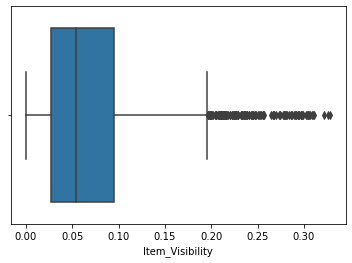

In [66]:
sns.boxplot(train.Item_Visibility)

<AxesSubplot:xlabel='Item_Visibility'>

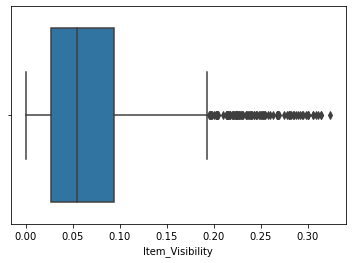

In [67]:
sns.boxplot(test.Item_Visibility)

## Missing values treatment

In [68]:
#Count of null values in each features of training set
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [69]:
#Count of null values in each features of test set
test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

* Item_Weight and Outlet_Size have some missing values in the data

In [70]:
train.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014048,0.027141,-0.011588,0.014123
Item_Visibility,-0.014048,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.027141,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.011588,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


__None of the features are highly correlated__

<AxesSubplot:>

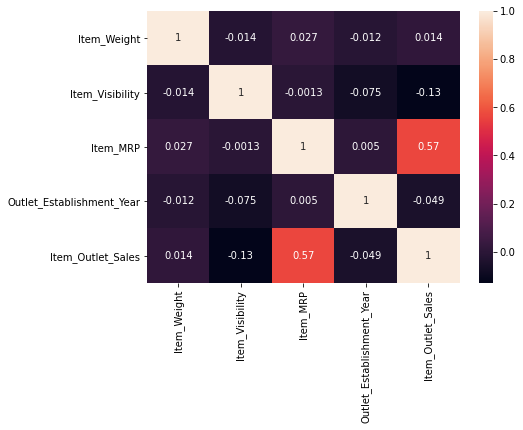

In [71]:
plt.figure(figsize=(7,5))
sns.heatmap(train.corr(),annot=True)

<Figure size 576x360 with 0 Axes>

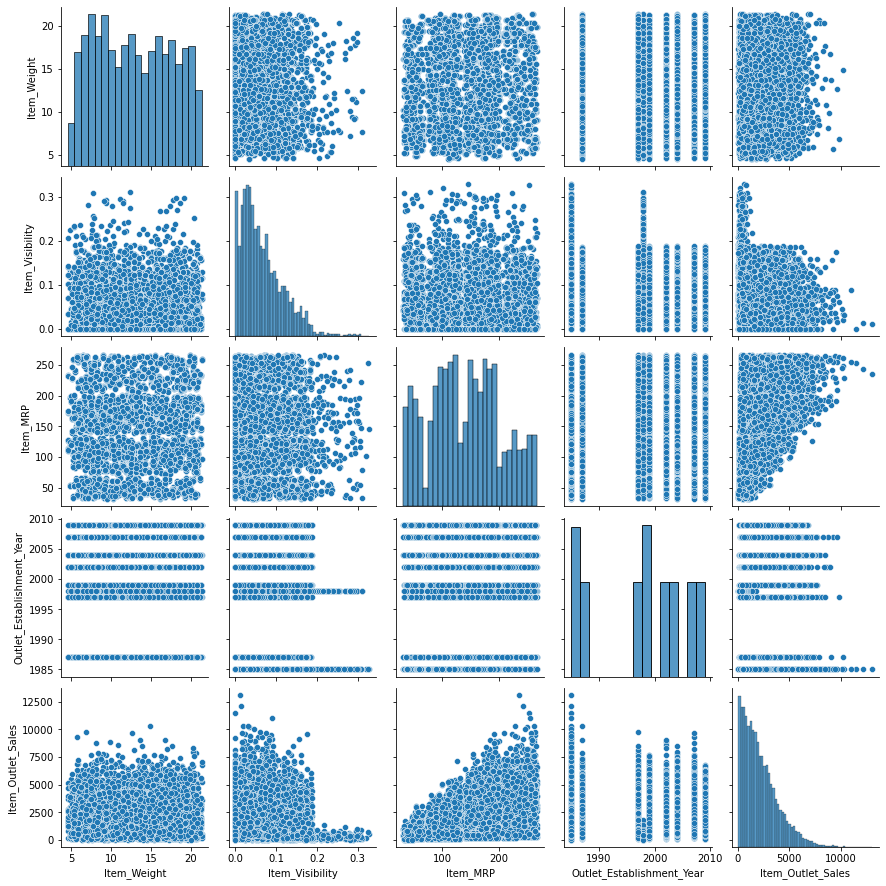

In [72]:
plt.figure(figsize=(8,5))
sns.pairplot(train)

__Filling Weight Missing Values__

In [73]:
train['Item_Weight'].mean()

12.857645184136183

<AxesSubplot:xlabel='Item_Weight'>

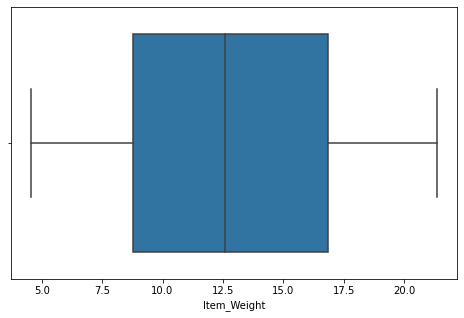

In [74]:
plt.figure(figsize=(8,5))
sns.boxplot('Item_Weight',data=train)

<AxesSubplot:xlabel='Item_Weight'>

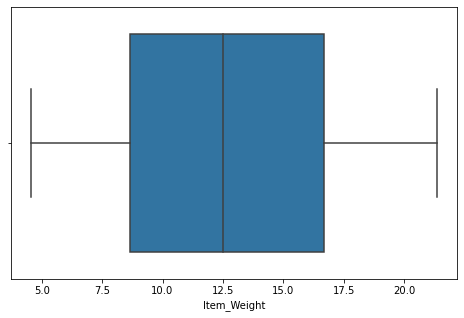

In [75]:
plt.figure(figsize=(8,5))
sns.boxplot('Item_Weight',data=test)

__The Box Plots above clearly show that there are no "Outliers" and hence we can impute the missing values with "Mean"__

In [76]:
train['Item_Weight'].describe()

count    7060.000000
mean       12.857645
std         4.643456
min         4.555000
25%         8.773750
50%        12.600000
75%        16.850000
max        21.350000
Name: Item_Weight, dtype: float64

In [77]:
# Filling missing values with Mean
train['Item_Weight']= train['Item_Weight'].fillna(train['Item_Weight'].mean())
test['Item_Weight']= test['Item_Weight'].fillna(test['Item_Weight'].mean())

In [78]:
train['Item_Weight'].isnull().sum(),test['Item_Weight'].isnull().sum()

(0, 0)

__Filling Outlet Size Missing Value__

In [79]:
# NaN values in train and test data set
train['Outlet_Size'].isnull().sum(),test['Outlet_Size'].isnull().sum()

(2410, 1606)

In [80]:
print(train['Outlet_Size'].value_counts())
print('-----------------------------------------')
print(test['Outlet_Size'].value_counts())

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64
-----------------------------------------
Medium    1862
Small     1592
High       621
Name: Outlet_Size, dtype: int64


In [81]:
#Filling missing values with Mode
train['Outlet_Size']= train['Outlet_Size'].fillna(train['Outlet_Size'].mode()[0])
test['Outlet_Size']= test['Outlet_Size'].fillna(test['Outlet_Size'].mode()[0])

In [82]:
train['Outlet_Size'].isnull().sum(),test['Outlet_Size'].isnull().sum()

(0, 0)

### Exploratory Data Analysis

In [83]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [84]:
train.head(4)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800


In [85]:
train['Outlet_Identifier'].value_counts()

OUT027    935
OUT013    932
OUT035    930
OUT046    930
OUT049    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

In [86]:
train['Outlet_Establishment_Year'].value_counts()

1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64

__We see there are some irregularities in the column and it is needed to fix them.__

In [87]:
train['Item_Fat_Content'].replace(['low fat','LF','reg'],['Low Fat','Low Fat','Regular'],inplace = True)
test['Item_Fat_Content'].replace(['low fat','LF','reg'],['Low Fat','Low Fat','Regular'],inplace = True)

In [88]:
train['Item_Fat_Content'] = train['Item_Fat_Content'].astype(str)

In [89]:
train['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [90]:
test['Item_Fat_Content'].value_counts()

Low Fat    3668
Regular    2013
Name: Item_Fat_Content, dtype: int64

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

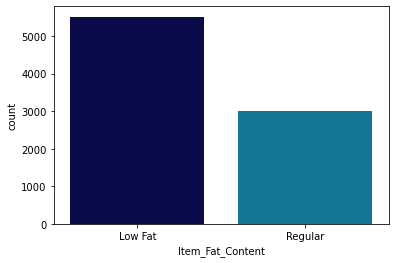

In [91]:
sns.countplot(train['Item_Fat_Content'],palette='ocean')

__The Items bought are more of Low Fat.__

In [92]:
train['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [93]:
test['Item_Type'].value_counts()

Snack Foods              789
Fruits and Vegetables    781
Household                638
Frozen Foods             570
Dairy                    454
Baking Goods             438
Canned                   435
Health and Hygiene       338
Meat                     311
Soft Drinks              281
Breads                   165
Hard Drinks              148
Starchy Foods            121
Others                   111
Breakfast                 76
Seafood                   25
Name: Item_Type, dtype: int64

<AxesSubplot:xlabel='Item_Type', ylabel='count'>

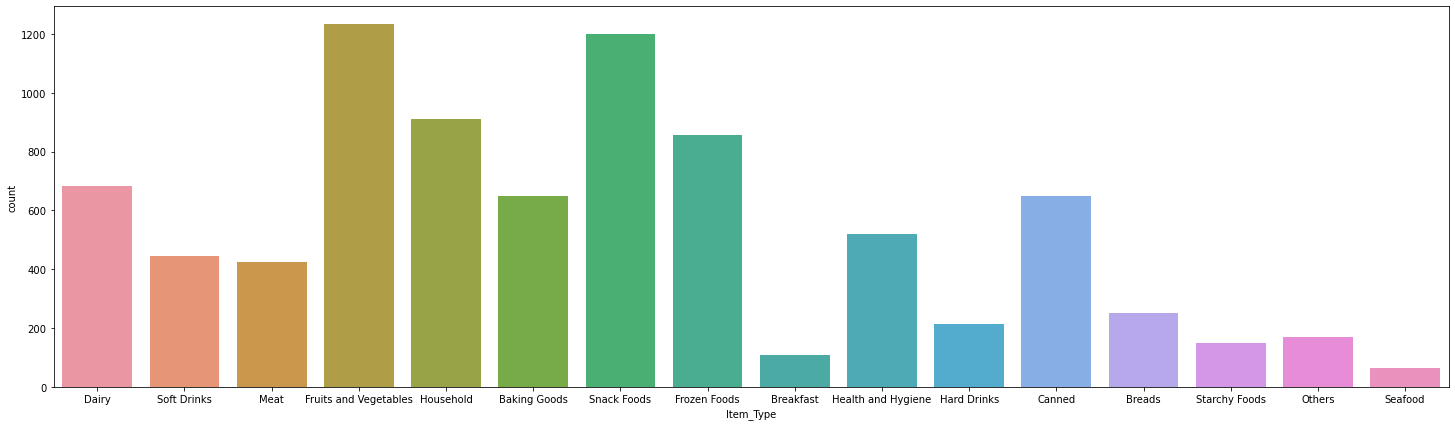

In [94]:
plt.figure(figsize=(25,7))
sns.countplot(train['Item_Type'])

* __Fruits and Vegetables are largely sold as people tend to use them on daily purpose.__
* __Snack Foods too have good sales.__

In [95]:
train['Outlet_Size'].value_counts()

Medium    5203
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [96]:
test['Outlet_Size'].value_counts()

Medium    3468
Small     1592
High       621
Name: Outlet_Size, dtype: int64

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

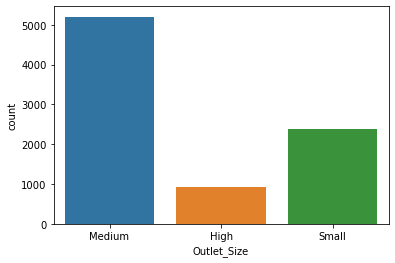

In [97]:
sns.countplot(train['Outlet_Size'])

__The Outlets are more of Medium Size__

In [98]:
 train['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [99]:
 test['Outlet_Location_Type'].value_counts()

Tier 3    2233
Tier 2    1856
Tier 1    1592
Name: Outlet_Location_Type, dtype: int64

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

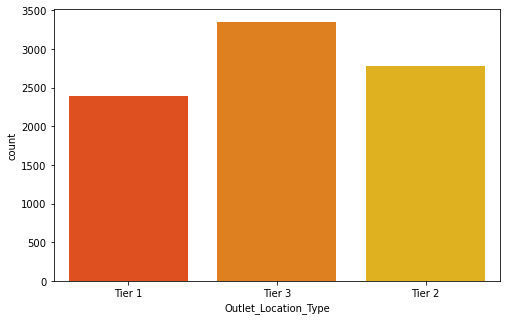

In [100]:
plt.figure(figsize=(8,5))
sns.countplot('Outlet_Location_Type',data=train,palette='autumn')

* __The Outlets are maximum in number in Tier 3 Cities__

In [101]:
train['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [102]:
test['Outlet_Type'].value_counts()

Supermarket Type1    3717
Grocery Store         722
Supermarket Type3     624
Supermarket Type2     618
Name: Outlet_Type, dtype: int64

<AxesSubplot:xlabel='Outlet_Type', ylabel='count'>

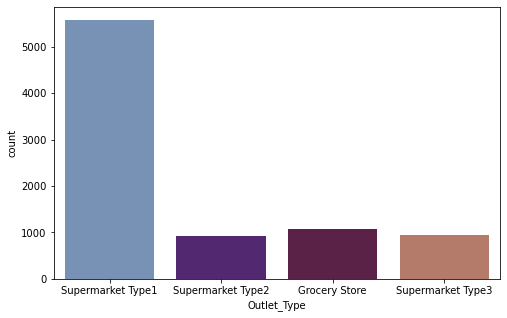

In [103]:
plt.figure(figsize=(8,5))
sns.countplot('Outlet_Type',data=train,palette='twilight')

* __The Outlets are more of Supermarket Type1__

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Item_Type'>

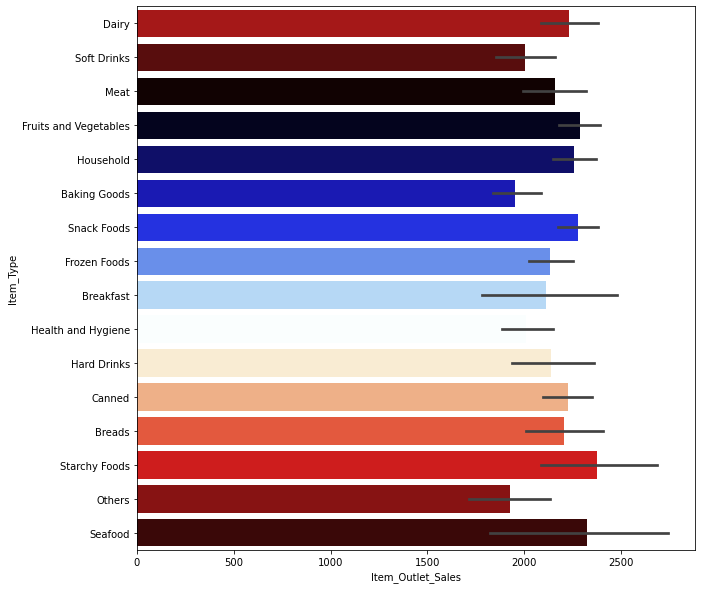

In [104]:
plt.figure(figsize=(10,10))
sns.barplot(y='Item_Type',x='Item_Outlet_Sales',data=train,palette='flag')

* __The products available were Fruits-Veggies and Snack Foods but the sales of Seafood and Starchy Foods seems higher and hence the sales can be improved with having stock of products that are most bought by customers.__

In [105]:
train['Item_Identifier'].value_counts().shape,test['Item_Identifier'].value_counts().shape

((1559,), (1543,))

__As 'Item_Identifier' is having missing some categories in test data set so we cannot use get dummies on it and also the number of category are very large it give our model a dimensionality curse__

### Data Preprocessing

In [106]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [107]:
# Labelencoding
le = LabelEncoder()
var_mod = train.select_dtypes(include='object').columns
for i in var_mod:
    train[i] = le.fit_transform(train[i])
    
for i in var_mod:
    test[i] = le.fit_transform(test[i])

* __Encoding the required columns from training and test dataset__

In [108]:
var_mod

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

# The df1 and df2 was used as experimenting data frame

In [109]:
df1 = train.copy(deep=True)
df2 = test.copy(deep=True)

df1 = pd.get_dummies(df1, columns=['Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Size'
                                       ,'Outlet_Location_Type','Outlet_Type' ],drop_first=True)
df2=pd.get_dummies(df2,columns=['Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Size'
                                  ,'Outlet_Location_Type','Outlet_Type'],drop_first=True)

__Trying the model with droping Item type and Item identifier__

In [110]:
train = pd.get_dummies(train, columns=['Item_Fat_Content','Outlet_Identifier','Outlet_Size'
                                       ,'Outlet_Location_Type','Outlet_Type' ],drop_first=True)
test=pd.get_dummies(test,columns=['Item_Fat_Content','Outlet_Identifier','Outlet_Size'
                                  ,'Outlet_Location_Type','Outlet_Type'],drop_first=True)

In [111]:
df1.shape,df2.shape

((8523, 12), (5681, 11))

In [112]:
df1.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [113]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Establishment_Year', 'Item_Outlet_Sales',
       'Item_Fat_Content_1', 'Outlet_Identifier_1', 'Outlet_Identifier_2',
       'Outlet_Identifier_3', 'Outlet_Identifier_4', 'Outlet_Identifier_5',
       'Outlet_Identifier_6', 'Outlet_Identifier_7', 'Outlet_Identifier_8',
       'Outlet_Identifier_9', 'Outlet_Size_1', 'Outlet_Size_2',
       'Outlet_Location_Type_1', 'Outlet_Location_Type_2', 'Outlet_Type_1',
       'Outlet_Type_2', 'Outlet_Type_3'],
      dtype='object')

In [145]:
test.drop(columns = ['Item_Identifier'], axis=1,inplace=True)

In [136]:
# Seperate Features and Target
X= train.drop(columns = ['Item_Outlet_Sales','Item_Identifier'], axis=1)
y= train['Item_Outlet_Sales']

In [137]:
X

,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_1,Outlet_Identifier_1,Outlet_Identifier_2,Outlet_Identifier_3,Outlet_Identifier_4,...,Outlet_Identifier_7,Outlet_Identifier_8,Outlet_Identifier_9,Outlet_Size_1,Outlet_Size_2,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3
0,9.300,0.016047,4,249.8092,1999,0,0,0,0,0,...,0,0,1,1,0,0,0,1,0,0
1,5.920,0.019278,14,48.2692,2009,1,0,0,1,0,...,0,0,0,1,0,0,1,0,1,0
2,17.500,0.016760,10,141.6180,1999,0,0,0,0,0,...,0,0,1,1,0,0,0,1,0,0
3,19.200,0.000000,6,182.0950,1998,1,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
4,8.930,0.000000,9,53.8614,1987,0,1,0,0,0,...,0,0,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0.056783,13,214.5218,1987,0,1,0,0,0,...,0,0,0,0,0,0,1,1,0,0
8519,8.380,0.046982,0,108.1570,2002,1,0,0,0,0,...,1,0,0,1,0,1,0,1,0,0
8520,10.600,0.035186,8,85.1224,2004,0,0,0,0,0,...,0,0,0,0,1,1,0,1,0,0
8521,7.210,0.145221,13,103.1332,2009,1,0,0,1,0,...,0,0,0,1,0,0,1,0,1,0


In [138]:
# 20% data as validation set
xtrain,xvalid,ytrain,yvalid = train_test_split(X,y,test_size=0.2,random_state=22)

In [139]:
# Model Building
features= X.columns
LR = LinearRegression(normalize=True)
LR.fit(xtrain,ytrain)
y_pred = LR.predict(xvalid)
coef = pd.Series(LR.coef_,features).sort_values()


In [141]:
LR.coef_

array([ 2.04897351e-01, -3.41762556e+02,  1.26766698e+00,  1.55514556e+01,
       -3.03199635e+13,  3.67043256e+01,  3.30886156e+15, -5.46954348e+14,
       -1.61114276e+15, -5.08633726e+14,  2.59196378e+15,  6.42143536e+14,
       -6.98554165e+14,  1.06793713e+15, -1.51480721e+14,  2.42964986e+15,
        1.14959209e+15,  6.38033335e+14, -1.39453197e+15, -1.21273129e+15,
        1.94466236e+15, -2.98612331e+15])

<AxesSubplot:>

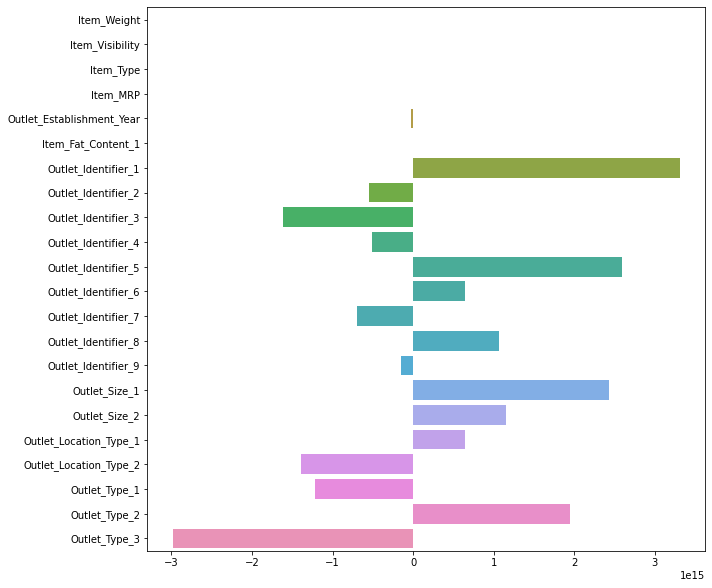

In [149]:
# Barplot for coefficients
plt.figure(figsize=(10,10))
sns.barplot(LR.coef_,features)

__Item Visibility, Outlet_Type, Outlet_Size, Outlet_Location_Type are the most important attributes to determine Item_Outlet_Sales.__

__RMSE__

In [143]:
MSE= metrics.mean_squared_error(yvalid,y_pred)
from math import sqrt
rmse = sqrt(MSE)
print("Root Mean Squared Error:",rmse)

Root Mean Squared Error: 1186.787982661157


* __Validation Set RMSE score is around 1186.78 from this linear model__

In [146]:
submission = pd.read_csv('sample_submission.csv')
final_predictions = LR.predict(test)
submission['Item_Outlet_Sales'] = final_predictions
#only positive predictions for the target variable
submission['Item_Outlet_Sales'] = submission['Item_Outlet_Sales'].apply(lambda x: 0 if x<0 else x)
submission.to_csv('my_submission3.csv', index=False)